In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/netflix-data-analysis/netflix_movies (1).csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Exploration Data Analysis

## 1. Movie type

In [7]:
df_pie = df['type'].value_counts()
df_pie

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

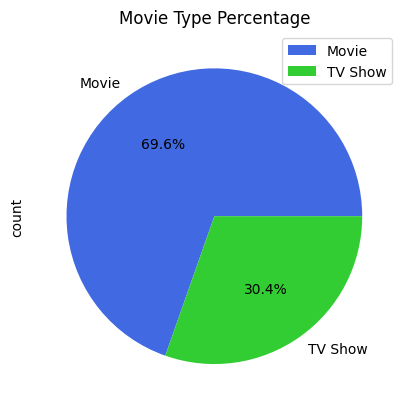

In [8]:
df_pie.plot(kind='pie', autopct = '%1.1f%%', colors = ['royalblue', 'limegreen'])
plt.title ('Movie Type Percentage')
plt.legend()
plt.show()

## 2. Movie title

In [9]:
df['title'].nunique()
df['title'].isnull().sum()

0

In [10]:
df['title'].value_counts().head()

title
15-Aug                               2
Feb-09                               2
22-Jul                               2
The Ridiculous 6                     1
Mike Epps: Don't Take It Personal    1
Name: count, dtype: int64

In [11]:
duplicated_titles = df['title'].value_counts().head(3).index.to_list()
duplicated_titles

['15-Aug', 'Feb-09', '22-Jul']

In [12]:
duplicate_show_ids = {}

for title in duplicated_titles:
    show_ids = df[df['title'] == title]['show_id'].tolist()
    duplicate_show_ids[title] = show_ids

duplicate_show_ids

{'15-Aug': ['s3963', 's5967'],
 'Feb-09': ['s3997', 's5965'],
 '22-Jul': ['s4523', 's5966']}

In [13]:
show_ids_to_drop = ['s5967', 's5965', 's5966']
df_cleaned = df[~df['show_id'].isin(show_ids_to_drop)]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6171 non-null   object
 4   cast          7979 non-null   object
 5   country       7974 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8801 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


## 3. Movie directors

In [14]:
df_director = df_cleaned['director'].value_counts().head(20).reset_index()
df_director.head()

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14


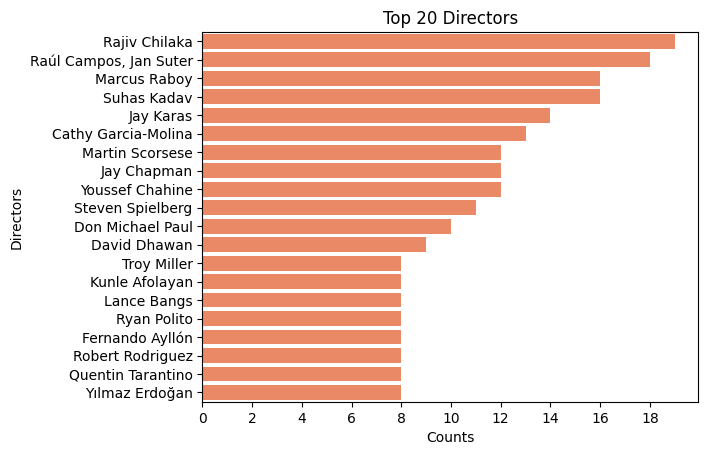

In [15]:
sns.barplot(data = df_director, y='director', x='count', color = 'coral')

plt.title('Top 20 Directors')
plt.xlabel('Counts')
plt.ylabel('Directors')
plt.xticks(ticks=range(0,20,2))

plt.show()

## 4. Movie cast

In [16]:
df_cleaned['cast'].value_counts().head(10)

cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Craig Sechler                                                                                                           

## 5. Movie countries

In [17]:
df_country = df_cleaned['country'].value_counts().head(10).reset_index()
df_country

,country,count
0,United States,2818
1,India,971
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


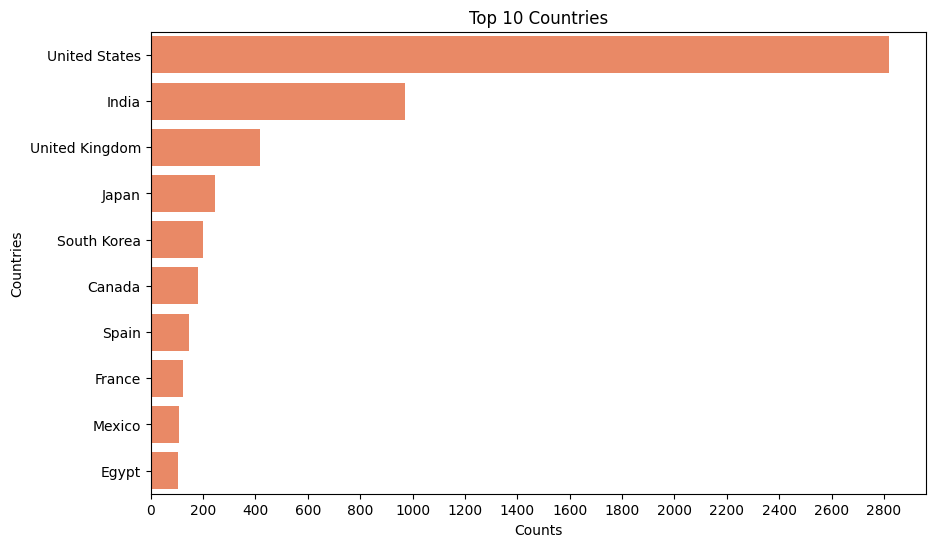

In [18]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df_country, y='country', x='count', color = 'coral')
plt.xlabel('Counts')
plt.ylabel('Countries')
plt.title('Top 10 Countries')
plt.xticks(ticks = range(0, 3000, 200))

plt.show()

## 6. Data Added 

In [19]:
df_cleaned['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [20]:
#year_added
df_cleaned['year'] = df_cleaned['date_added'].str.extract(r'(\d{4})')

#month_added
df_cleaned['month'] = df_cleaned['date_added'].str.extract(r'([A-Za-z]{3})')

#date_added
df_cleaned['date'] = df_cleaned['date_added'].str.extract(r'(\d{2})')

df_cleaned.head()

/tmp/ipykernel_31/2774644391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['date_added'].str.extract(r'(\d{4})')
/tmp/ipykernel_31/2774644391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned['date_added'].str.extract(r'([A-Za-z]{3})')
/tmp/ipykernel_31/2774644391.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Sep,25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Sep,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Sep,24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Sep,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,Sep,24


## 7. Release Year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


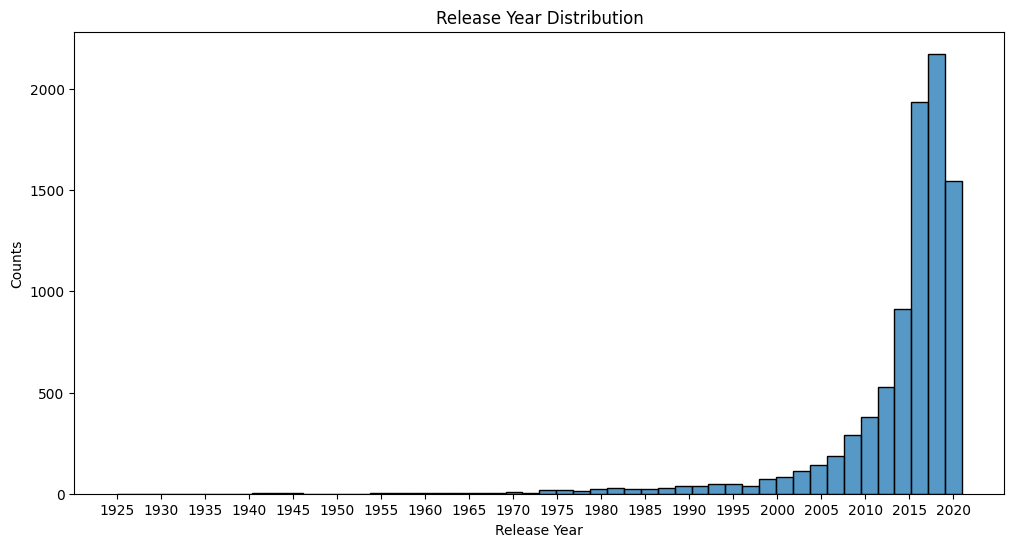

In [21]:
plt.figure(figsize = (12,6))
sns.histplot(data = df_cleaned, x = 'release_year', bins = 50)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Counts')
plt.xticks(ticks = range(df['release_year'].min(),df['release_year'].max(), 5))
plt.show()

## 8. Movie Rating

In [26]:
df_rating = df['rating'].value_counts().reset_index()
df_rating

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


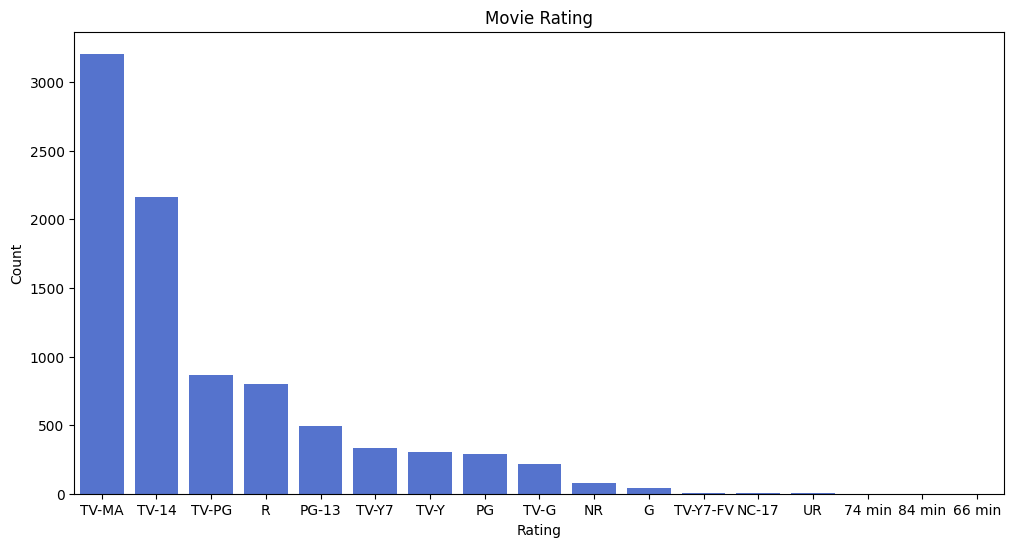

In [32]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df_rating, x='rating', y='count', color = 'royalblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Movie Rating')
plt.show()

## 9. Movie duration

Text(0.5, 1.0, 'Durations of the Movies')

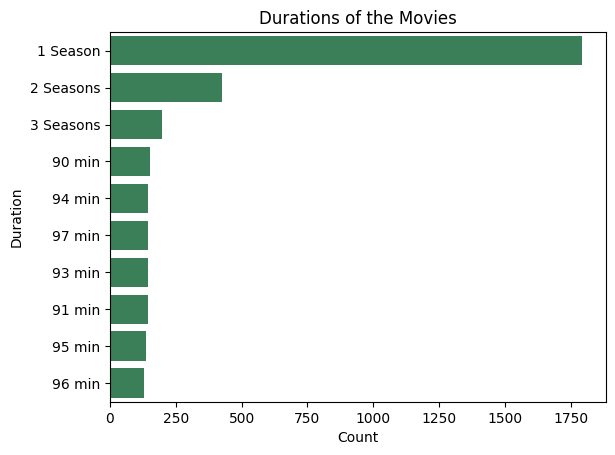

In [49]:
df_duration = df_cleaned['duration'].value_counts().head(10).reset_index()
sns.barplot(data = df_duration, y='duration', x='count', color = 'seagreen')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.title('Durations of the Movies')

## 10. Listed in

Text(0.5, 1.0, 'Types of Movies')

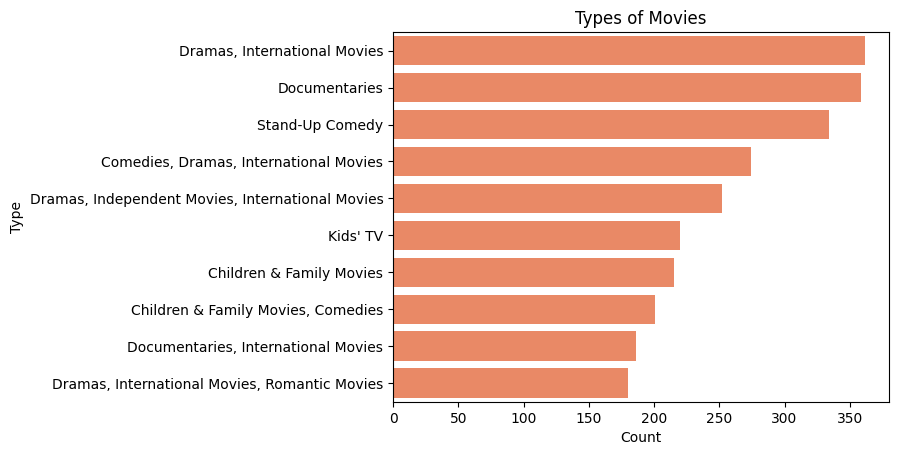

In [48]:
df_list = df_cleaned['listed_in'].value_counts().head(10).reset_index()
sns.barplot(data = df_list, y='listed_in', x='count', color = 'coral')
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Types of Movies')